<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simple_training/blob/main/Regr%C3%A9ssionLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv("https://www.stat4decision.com/telecom.csv")

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [ ]:
data.describe(include="all")

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,417-2035,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
data.shape

(3333, 21)

In [ ]:
data_=data.dropna()
data_.shape

(3333, 21)

In [ ]:
print("Nombre de NaN est:{}".format((data.shape)[0]-(data_.shape)[0]))

Nombre de NaN est:0


Donc la data n'a pas de valeur non connus

In [ ]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [ ]:
data["Churn?"]=data["Churn?"].astype("category")

Nous avons prendre que des variables quantitatives pour cette étude

In [ ]:
x=data.select_dtypes(np.number).drop(["Account Length","Area Code"],axis=1)
y=data["Churn?"].cat.codes
y.unique()

array([0, 1], dtype=int8)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.8)
lr=LogisticRegression().fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr.coef_

array([[-2.68057254e-02,  8.69052060e-03, -9.94199287e-03,
         1.52127994e-03,  9.75156532e-04, -1.19657288e-02,
         1.02155776e-05, -1.40867668e-03, -1.31864986e-02,
         1.40755603e-05,  1.85563656e-02, -1.23252636e-01,
         4.97163777e-03,  3.91129053e-01]])

In [ ]:
pd.DataFrame(np.concatenate([lr.intercept_.reshape(-1,1),
                             lr.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T


,coef
constante,-0.043186
VMail Message,-0.026806
Day Mins,0.008691
Day Calls,-0.009942
Day Charge,0.001521
Eve Mins,0.000975
Eve Calls,-0.011966
Eve Charge,0.000010
Night Mins,-0.001409
Night Calls,-0.013186


Pour statsmodels

In [ ]:
x_stat=sm.add_constant(x_train)

In [ ]:
model=sm.Logit(y_train,x_stat)

In [ ]:
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.352482
         Iterations 7


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2651
Method:                           MLE   Df Model:                           14
Date:                Wed, 23 Dec 2020   Pseudo R-squ.:                  0.1518
Time:                        02:12:54   Log-Likelihood:                -939.72
converged:                       True   LL-Null:                       -1107.9
Covariance Type:            nonrobust   LLR p-value:                 3.084e-63
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.2395      0.752    -10.962      0.000      -9.713      -6.766
VMail Message     -0.0267      0.005     -5.276      0.000      -0.037      -0.017
Day Mins          -1.8690      3.511

In [ ]:
predictions_1=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions_1)
print("accuracy:{:.2%}".format(acc))

accuracy:85.91%


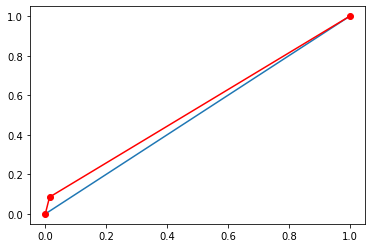

In [ ]:
from sklearn.metrics import roc_curve
fprsm,tprsm,_=roc_curve(y_test,predictions_1)
import matplotlib.pyplot as plt
plt.plot([1,0],[1,0])
plt.plot(fprsm,tprsm,"ro-")
plt.show()

In [ ]:
x_test=sm.add_constant(x_test)

In [ ]:
predictions_2=model.predict(x_test)

ValueError: ignored